In [1]:
import pandas

# leitura db (data August 21, 2020)
dataset = pandas.read_csv("datasets\Call_Data.csv", sep=',', dtype={"CAD Event Number": str,
                                                                   "Event Clearance Description": str,
                                                                   "Call Type": str,
                                                                   "Initial Call Type": str,
                                                                   "Final Call Type": str,
                                                                   "Precinct": str,
                                                                   "Sector": str,
                                                                   "Beat": str})

'''
Lista das colunas em ordem:

CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,
Original Time Queued,Arrived Time,Precinct,Sector,Beat,Blurred_Longitude,Blurred_Latitude

'''


dataset.shape

# Mostra em que formato se encontra os dados
dataset.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 4418350 entries, 0 to 4418349
Data columns (total 13 columns):
CAD Event Number               object
Event Clearance Description    object
Call Type                      object
Priority                       int64
Initial Call Type              object
Final Call Type                object
Original Time Queued           object
Arrived Time                   object
Precinct                       object
Sector                         object
Beat                           object
Blurred_Longitude              float64
Blurred_Latitude               float64
dtypes: float64(2), int64(1), object(10)
memory usage: 438.2+ MB


In [2]:
# Mostra 5 linhas da base de dados

dataset.head(5)

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,Blurred_Longitude,Blurred_Latitude
0,2015000009853,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,PARKING VIOLATION (EXCEPT ABANDONED CAR),--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR),01/09/2015 21:53:56 PM,Jan 01 1900 00:00:00:000AM,NORTH,UNION,U3,-122.272566,47.667146
1,2016000024893,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",6,SECONDARY - THEFT (NOT SHOPLIFT OR SERVICES),--THEFT - CAR PROWL,01/21/2016 18:50:31 PM,Jan 21 2016 20:41:00:000PM,WEST,KING,K1,-122.338327,47.605300
2,2015000377718,PHYSICAL ARREST MADE,ONVIEW,2,WARRANT - FELONY PICKUP,--WARRANT SERVICES - MISDEMEANOR,10/28/2015 14:27:11 PM,Oct 28 2015 14:27:11:000PM,EAST,EDWARD,E1,-122.319541,47.619917
3,2016000029470,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,"MVC - HIT AND RUN (NON INJURY), INCLUDES IP/JO",--TRAFFIC - MV COLLISION INVESTIGATION,01/25/2016 15:22:08 PM,Jan 25 2016 18:03:05:000PM,NORTH,BOY,B1,-122.388861,47.668674
4,2017000162008,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",--PREMISE CHECKS - BUSINESS CHECK,05/09/2017 00:06:25 AM,May 09 2017 00:06:25:000AM,NORTH,LINCOLN,L3,-1.000000,-1.000000


In [3]:
# contagem simples de dados

dataset.count()

CAD Event Number               4418350
Event Clearance Description    4418350
Call Type                      4418350
Priority                       4418350
Initial Call Type              4418350
Final Call Type                4418350
Original Time Queued           4418350
Arrived Time                   4418350
Precinct                       4418350
Sector                         4375472
Beat                           4418350
Blurred_Longitude              4418350
Blurred_Latitude               4418350
dtype: int64

In [4]:
# verifica quais colunas possuem valores nulos

dataset.isnull().sum()

CAD Event Number                   0
Event Clearance Description        0
Call Type                          0
Priority                           0
Initial Call Type                  0
Final Call Type                    0
Original Time Queued               0
Arrived Time                       0
Precinct                           0
Sector                         42878
Beat                               0
Blurred_Longitude                  0
Blurred_Latitude                   0
dtype: int64

In [5]:
# verifica a quantidade de "Descrição final" que são únicas

dataset["Event Clearance Description"].nunique()

25

In [6]:
# verifica a quantidade de "Classificação inicial" que são únicas

dataset["Initial Call Type"].nunique()

315

In [7]:
# verifica a quantidade de "Classificação final" que são únicas

dataset["Final Call Type"].nunique()

419

In [15]:
# Call type unique count

dataset["Call Type"].nunique()

11

In [9]:
# explores Call Type

import seaborn as sns
sns.countplot(x='Call Type',data=dataset,palette='viridis')

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1873bf4bba8&gt;

In [10]:
from datetime import datetime

# transforma a data do registro em datetime

"""
01/09/2015 21:53:56 PM
"""

def date_convert(date_to_convert):
     return datetime.strptime(date_to_convert, "%m/%d/%Y %H:%M:%S")


dataset['Original Time Queued'] = dataset['Original Time Queued'].str.replace(" [A|P]?M", "")
dataset['Original Time Queued'] = dataset['Original Time Queued'].apply(date_convert)

In [11]:
dataset['Original Time Queued'].head(5)

0   2015-01-09 21:53:56
1   2016-01-21 18:50:31
2   2015-10-28 14:27:11
3   2016-01-25 15:22:08
4   2017-05-09 00:06:25
Name: Original Time Queued, dtype: datetime64[ns]

In [12]:
# adiciona as colunas "Hora, Mês e Dia da Semana" do registro

dataset['Hour'] = dataset['Original Time Queued'].apply(lambda time:time.hour)
dataset['Month'] = dataset['Original Time Queued'].apply(lambda time:time.month)
dataset['Day of Week'] = dataset['Original Time Queued'].apply(lambda time:time.dayofweek)

In [13]:
# mapeamento do dia da semana com o nome

dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

dataset['Day of Week'] = dataset['Day of Week'].map(dmap)
dataset['Day of Week'].head(5)

0    Fri
1    Thu
2    Wed
3    Mon
4    Tue
Name: Day of Week, dtype: object

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1876bd8f320&gt;

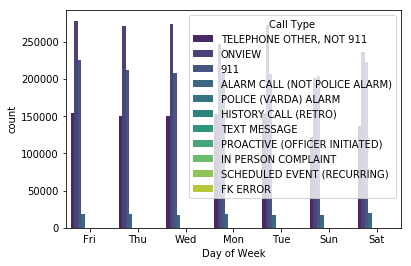

In [14]:
sns.countplot(x='Day of Week',data=dataset,hue='Call',palette='viridis')

In [29]:
# the most common day to 

countPerDay = dataset.groupby('Day of Week').count().sort_values('Hour', ascending=False)
countPerDay

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,Blurred_Longitude,Blurred_Latitude,call_type,Hour,Month
Day of Week,,,,,,,,,,,,,,,,
Fri,676756,676756,676756,676756,676756,676756,676756,676756,676756,670463,676756,676756,676756,676756,676756,676756
Thu,652972,652972,652972,652972,652972,652972,652972,652972,652972,646231,652972,652972,652972,652972,652972,652972
Wed,651798,651798,651798,651798,651798,651798,651798,651798,651798,644520,651798,651798,651798,651798,651798,651798
Tue,650442,650442,650442,650442,650442,650442,650442,650442,650442,643940,650442,650442,650442,650442,650442,650442
Mon,626014,626014,626014,626014,626014,626014,626014,626014,626014,620413,626014,626014,626014,626014,626014,626014
Sat,615670,615670,615670,615670,615670,615670,615670,615670,615670,610052,615670,615670,615670,615670,615670,615670
Sun,544698,544698,544698,544698,544698,544698,544698,544698,544698,539853,544698,544698,544698,544698,544698,544698


In [43]:
''' Event Clearance Description '''
"Prank?"
# ["0" => "UNABLE TO LOCATE INCIDENT OR COMPLAINANT"],
# ["1" => "NO SUCH ADDRESS OR LOCATION"],
# ["2" => "NON-CRIMINAL REFERRAL"],
# ["3" => "FALSE COMPLAINT/UNFOUNDED"],
# ["4" => "NO POLICE ACTION POSSIBLE OR NECESSARY"],

"Not Prank!"
# ['CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)'], 
# ['REPORT WRITTEN (NO ARREST)'],
# ['PHYSICAL ARREST MADE'],
# ['PROBLEM SOLVING PROJECT'],
# ['ASSISTANCE RENDERED'],
# ['ORAL WARNING GIVEN'],
# ['DUPLICATED OR CANCELLED BY RADIO'],
# ['OTHER REPORT MADE'],
# ['FOLLOW-UP REPORT MADE'],
# ['RESPONDING UNIT(S) CANCELLED BY RADIO'],
# ['INCIDENT LOCATED, PUBLIC ORDER RESTORED'],
# ['TRANSPORTATION OR ESCORT PROVIDED'],
# ['STREET CHECK WRITTEN'],
# ['RADIO BROADCAST AND CLEAR'],
# ['Evidence Submitted (new incident number required)'],
# ['SERVICE OF DVPA ORDER'],
# ['Citations � Criminal Citation Issued (new incident number required)'],
# ['-'],
# ['(NOT CURRENTLY USED) ALARM NO RESPONSE'],
# ['EXTRA UNIT'],

prank = [
    'UNABLE TO LOCATE INCIDENT OR COMPLAINANT', 
    'NO SUCH ADDRESS OR LOCATION', 
    'NON-CRIMINAL REFERRAL',
    'FALSE COMPLAINT/UNFOUNDED',
    'NO POLICE ACTION POSSIBLE OR NECESSARY'
]

nonPrank = [
    'CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)',
    'REPORT WRITTEN (NO ARREST)',
    'PHYSICAL ARREST MADE',
    'PROBLEM SOLVING PROJECT',
    'ASSISTANCE RENDERED',
    'ORAL WARNING GIVEN',
    'DUPLICATED OR CANCELLED BY RADIO',
    'OTHER REPORT MADE',
    'FOLLOW-UP REPORT MADE',
    'RESPONDING UNIT(S) CANCELLED BY RADIO',
    'INCIDENT LOCATED, PUBLIC ORDER RESTORED',
    'TRANSPORTATION OR ESCORT PROVIDED',
    'STREET CHECK WRITTEN',
    'RADIO BROADCAST AND CLEAR',
    'Evidence Submitted (new incident number required)',
    'SERVICE OF DVPA ORDER',
    'Citations � Criminal Citation Issued (new incident number required)',
    '-',
    '(NOT CURRENTLY USED) ALARM NO RESPONSE',
    'EXTRA UNIT'
]


dfPrank = dataset[dataset['Event Clearance Description'].isin(prank)]

dfNonPrank = dataset[dataset['Event Clearance Description'].isin(nonPrank)]
dfNonPrank.count()

CAD Event Number               3906312
Event Clearance Description    3906312
Call Type                      3906312
Priority                       3906312
Initial Call Type              3906312
Final Call Type                3906312
Original Time Queued           3906312
Arrived Time                   3906312
Precinct                       3906312
Sector                         3864922
Beat                           3906312
Blurred_Longitude              3906312
Blurred_Latitude               3906312
call_type                      3906312
Hour                           3906312
Month                          3906312
Day of Week                    3906312
dtype: int64

In [44]:
# import statistics as st

# prankPerDay = st.mode(dataset['Hour'])
# prankPerDay


prankPerHour = dfPrank.groupby('Hour').count().sort_values('Beat', ascending=False)
prankPerHour

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,Blurred_Longitude,Blurred_Latitude,call_type,Month,Day of Week
Hour,,,,,,,,,,,,,,,,
19,29033,29033,29033,29033,29033,29033,29033,29033,29033,28968,29033,29033,29033,29033,29033,29033
18,28840,28840,28840,28840,28840,28840,28840,28840,28840,28762,28840,28840,28840,28840,28840,28840
20,27581,27581,27581,27581,27581,27581,27581,27581,27581,27504,27581,27581,27581,27581,27581,27581
17,27581,27581,27581,27581,27581,27581,27581,27581,27581,27505,27581,27581,27581,27581,27581,27581
22,27156,27156,27156,27156,27156,27156,27156,27156,27156,27102,27156,27156,27156,27156,27156,27156
21,26546,26546,26546,26546,26546,26546,26546,26546,26546,26489,26546,26546,26546,26546,26546,26546
15,25930,25930,25930,25930,25930,25930,25930,25930,25930,25818,25930,25930,25930,25930,25930,25930
16,25868,25868,25868,25868,25868,25868,25868,25868,25868,25786,25868,25868,25868,25868,25868,25868
23,24517,24517,24517,24517,24517,24517,24517,24517,24517,24484,24517,24517,24517,24517,24517,24517


In [45]:
prankPerDay = dfPrank.groupby('Day of Week').count().sort_values('Beat', ascending=False)
prankPerDay

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,Blurred_Longitude,Blurred_Latitude,call_type,Hour,Month
Day of Week,,,,,,,,,,,,,,,,
Fri,78453,78453,78453,78453,78453,78453,78453,78453,78453,78235,78453,78453,78453,78453,78453,78453
Sat,76271,76271,76271,76271,76271,76271,76271,76271,76271,76122,76271,76271,76271,76271,76271,76271
Thu,74310,74310,74310,74310,74310,74310,74310,74310,74310,74063,74310,74310,74310,74310,74310,74310
Wed,72547,72547,72547,72547,72547,72547,72547,72547,72547,72270,72547,72547,72547,72547,72547,72547
Tue,71868,71868,71868,71868,71868,71868,71868,71868,71868,71632,71868,71868,71868,71868,71868,71868
Mon,70657,70657,70657,70657,70657,70657,70657,70657,70657,70456,70657,70657,70657,70657,70657,70657
Sun,67932,67932,67932,67932,67932,67932,67932,67932,67932,67772,67932,67932,67932,67932,67932,67932


In [46]:
prankPerMonth = dfPrank.groupby('Month').count().sort_values('Beat', ascending=False)
prankPerMonth

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,Blurred_Longitude,Blurred_Latitude,call_type,Hour,Day of Week
Month,,,,,,,,,,,,,,,,
7,53194,53194,53194,53194,53194,53194,53194,53194,53194,53055,53194,53194,53194,53194,53194,53194
8,51336,51336,51336,51336,51336,51336,51336,51336,51336,51209,51336,51336,51336,51336,51336,51336
6,48866,48866,48866,48866,48866,48866,48866,48866,48866,48740,48866,48866,48866,48866,48866,48866
5,44797,44797,44797,44797,44797,44797,44797,44797,44797,44684,44797,44797,44797,44797,44797,44797
9,44110,44110,44110,44110,44110,44110,44110,44110,44110,43992,44110,44110,44110,44110,44110,44110
10,42509,42509,42509,42509,42509,42509,42509,42509,42509,42392,42509,42509,42509,42509,42509,42509
3,39582,39582,39582,39582,39582,39582,39582,39582,39582,39442,39582,39582,39582,39582,39582,39582
4,39388,39388,39388,39388,39388,39388,39388,39388,39388,39230,39388,39388,39388,39388,39388,39388
12,38272,38272,38272,38272,38272,38272,38272,38272,38272,38161,38272,38272,38272,38272,38272,38272


In [47]:
prankPerInitialType = dfPrank.groupby('Initial Call Type').count().sort_values('Beat', ascending=False)
prankPerInitialType

,CAD Event Number,Event Clearance Description,Call Type,Priority,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,Blurred_Longitude,Blurred_Latitude,call_type,Hour,Month,Day of Week
Initial Call Type,,,,,,,,,,,,,,,,
PARKING VIOLATION (EXCEPT ABANDONED CAR),54398,54398,54398,54398,54398,54398,54398,54398,54392,54398,54398,54398,54398,54398,54398,54398
"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",47269,47269,47269,47269,47269,47269,47269,47269,47223,47269,47269,47269,47269,47269,47269,47269
"ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE",43364,43364,43364,43364,43364,43364,43364,43364,43362,43364,43364,43364,43364,43364,43364,43364
"ALARM - COMM, SILENT/AUD BURG (INCL BANKS)",42166,42166,42166,42166,42166,42166,42166,42166,42163,42166,42166,42166,42166,42166,42166,42166
"DISTURBANCE, MISCELLANEOUS/OTHER",35000,35000,35000,35000,35000,35000,35000,35000,34991,35000,35000,35000,35000,35000,35000,35000
HAZ - POTENTIAL THRT TO PHYS SAFETY (NO HAZMAT),13890,13890,13890,13890,13890,13890,13890,13890,13887,13890,13890,13890,13890,13890,13890,13890
"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",13433,13433,13433,13433,13433,13433,13433,13433,13428,13433,13433,13433,13433,13433,13433,13433
"NOISE - DIST, GENERAL (CONST, RESID, BALL PLAY)",10868,10868,10868,10868,10868,10868,10868,10868,10866,10868,10868,10868,10868,10868,10868,10868
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),10196,10196,10196,10196,10196,10196,10196,10196,10192,10196,10196,10196,10196,10196,10196,10196


In [48]:
dfPrank['Precinct'].agg(['mode'])

,mode
0,WEST
